# Introduction to Stochastic Processes

## Bernoulli process

The probability of ocurrance at any time is $p$.

### Packages and options

In [1]:
using Distributions
import CairoMakie as MK
using AlgebraOfGraphics

include(joinpath("..", "src", "makie.jl"))

mat2df (generic function with 2 methods)

### Custom functions

The following function simulates $n$ Bernoulli process of size $T$ with probability of
success $p$.

In [2]:
function plot_bernoulli(T, n, p; kwargs...)
    y = rand(Bernoulli(p), (T, n))
    df = mat2df(Int.(y))
    vissim(df, :t, Symbol("X(t)"); kwargs...)
end

plot_bernoulli (generic function with 1 method)

### Simulate and visualize

Simulating $n = 4$ realizations of the Bernoulli process with $T = 100$.

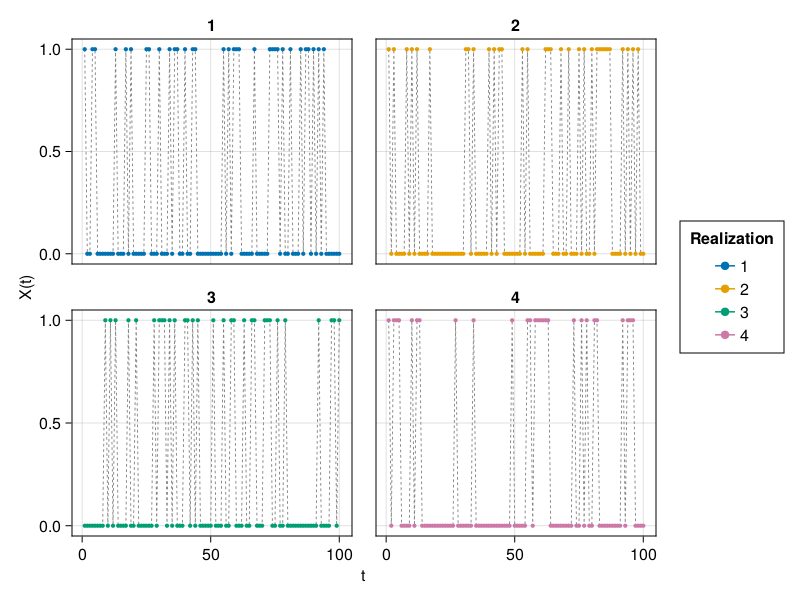

In [3]:
fig1 = plot_bernoulli(100, 4, 0.3; layout = true, linewidth = 0.9, markersize = 6)

Simulating $n = 4$ realizations of the Bernoulli process with $T = 1000$.

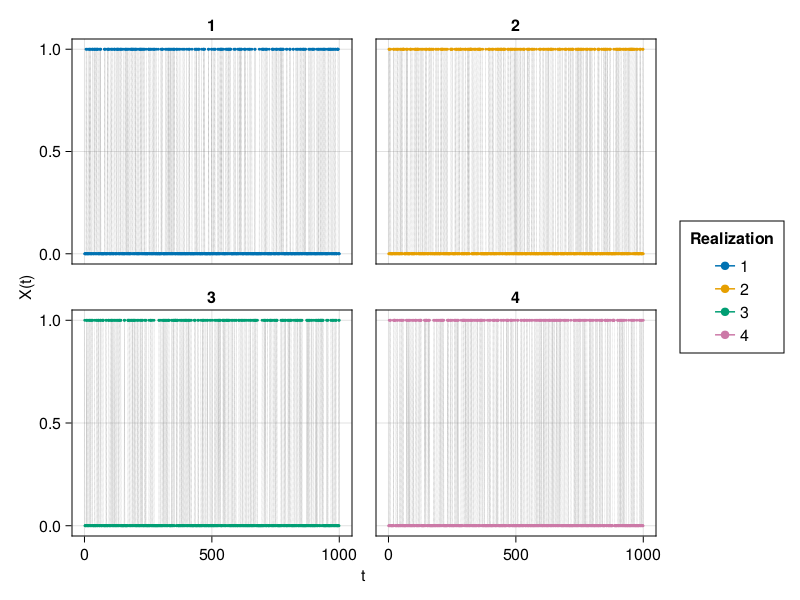

In [4]:
fig2 = plot_bernoulli(1000, 4, 0.3; layout = true, linewidth = 0.2, markersize = 4)

## Random walk (1D)

### Packages and options

In [5]:
using Distributions
import CairoMakie as MK
using AlgebraOfGraphics

include(joinpath("..", "src", "makie.jl"))

mat2df (generic function with 2 methods)

### Custom function

The following function simulates $n$ realizations of a 1D random walk of size $T$.

In [6]:
function plot_rw_1d(T, n; kwargs...)
    # initialize
    y = zeros(T, n)

    # simulate
    for i in 1:n
        for t in 2:T
            local step = sample([1, -1])
            y[t, i] = y[t - 1, i] + step
        end
    end

    # visualize
    df = mat2df(y)
    vissim(df, :t, Symbol("X(t)"); kwargs...)
end

plot_rw_1d (generic function with 1 method)

### Simulate and visualize

Simulating $n = 2$ realizations of a random walk with $T = 100$.

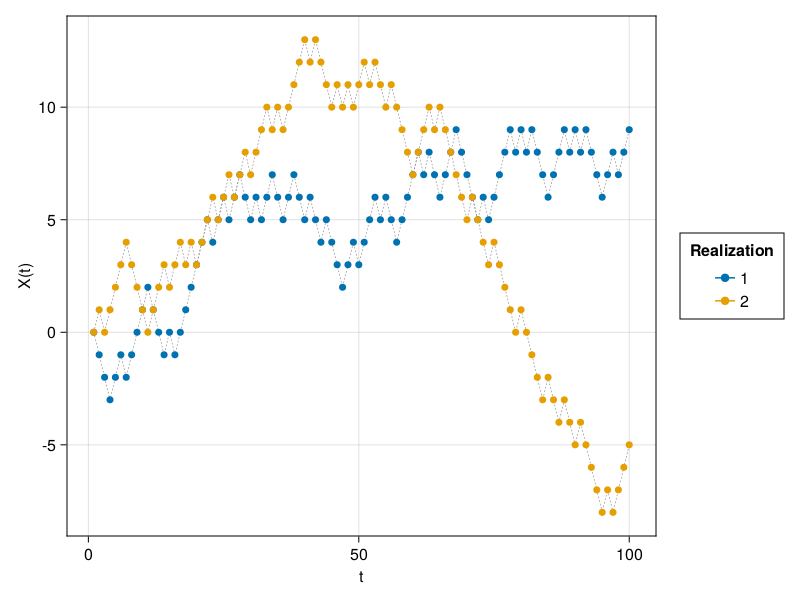

In [7]:
fig1 = plot_rw_1d(100, 2; linewidth = 0.6)

Simulating $n = 6$ realizations of a random walk with $T = 100000$.

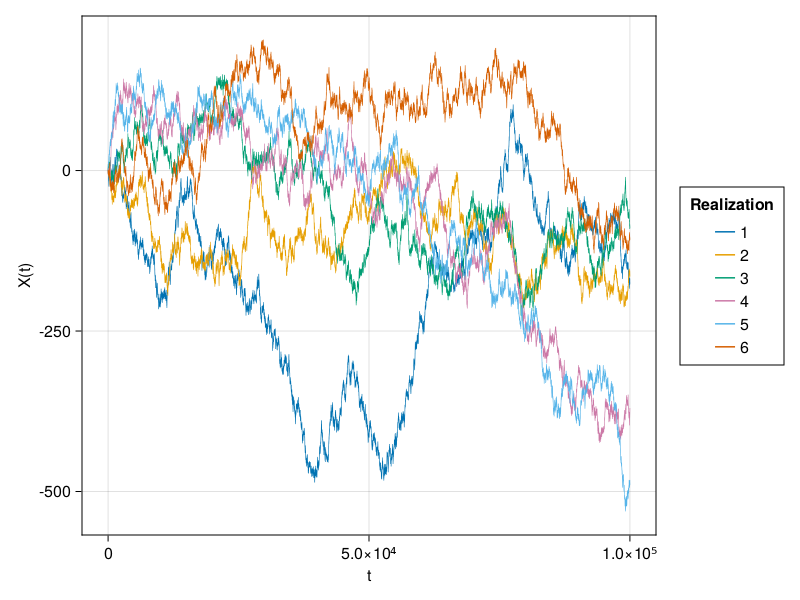

In [8]:
fig2 = plot_rw_1d(100000, 6; linewidth = 0.6, onlylines = true)

## Gaussian random walk (1D)

### Packages and options

In [9]:
using Distributions
import CairoMakie as MK
using AlgebraOfGraphics

include(joinpath("..", "src", "makie.jl"))

mat2df (generic function with 2 methods)

### Custom function

The following function simulates $n$ realizations of a 1D Gaussian random walk of size
$T$.

In [10]:
function plot_grw_1d(T, n; kwargs...)
    # initialize
    y = zeros(T, n)

    # simulate
    for i in 1:n
        for t in 2:T
            local step = rand(Normal(0, 5))
            y[t, i] = y[t - 1, i] + step
        end
    end

    # visualize
    df = mat2df(y)
    vissim(df, :t, Symbol("X(t)"); kwargs...)
end

plot_grw_1d (generic function with 1 method)

### Simulate and visualize

Simulating $n = 2$ realizations of a Gaussian random walk with $T = 100$.

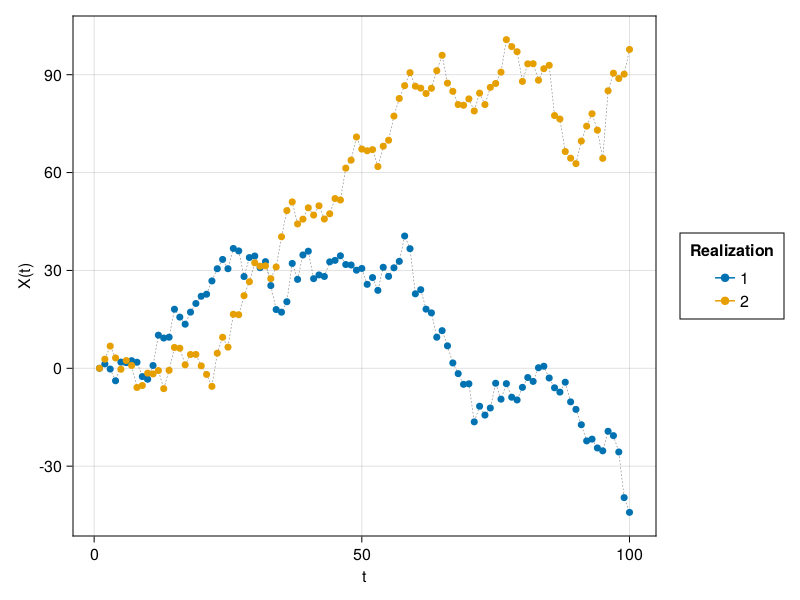

In [11]:
fig1 = plot_grw_1d(100, 2, linewidth = 0.6, markersize = 10)

Simulating $n = 6$ realizations of a Gaussian random walk with $T = 100000$.

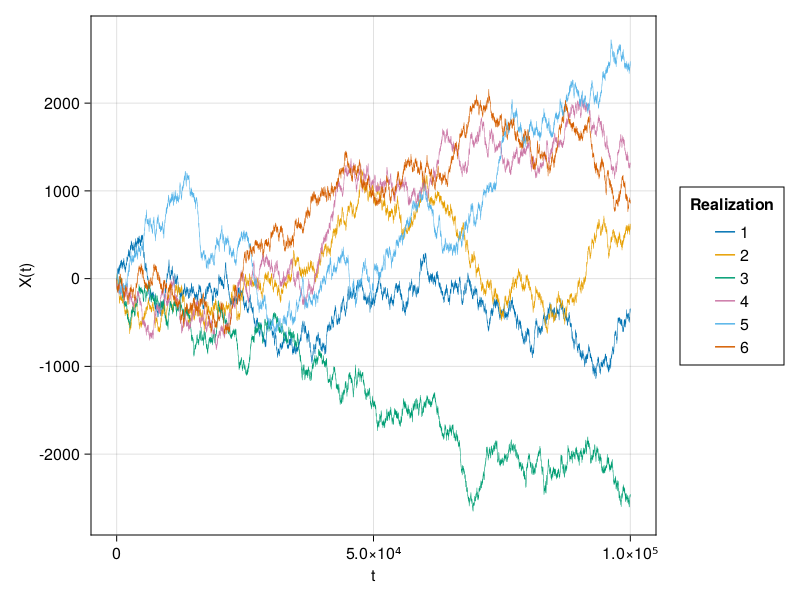

In [12]:
fig2 = plot_grw_1d(100000, 6; linewidth = 0.5, onlylines = true)

## Gaussian random walk (2D)

### Packages and options

In [13]:
using Distributions
import CairoMakie as MK
using AlgebraOfGraphics

include(joinpath("..", "src", "makie.jl"))

mat2df (generic function with 2 methods)

### Custom functions

The following function simulates $n$ realizations of a 2D Gaussian random walk of size
$T$.

In [14]:
function plot_rw_2d(T, n; kwargs...)
    # initialize
    y = zeros(T, n)
    z = zeros(T, n)

    # simulate
    for i in 1:n
        for t in 2:T
            local step = rand(Normal(0, 3))
            local dir = rand(Bernoulli(0.5))
            if dir
                y[t, i] = y[t - 1, i] + step
                z[t, i] = z[t - 1, i]
            else
                y[t, i] = y[t - 1, i]
                z[t, i] = z[t - 1, i] + step

            end
        end
    end

    # visualize
    df = mat2df(y, z)
    vissim(df, Symbol("X(t)"), Symbol("Y(t)"); kwargs...)
end

plot_rw_2d (generic function with 1 method)

Simulating $n = 4$ realizations of a 2D Gaussian random walk with $T = 100$.

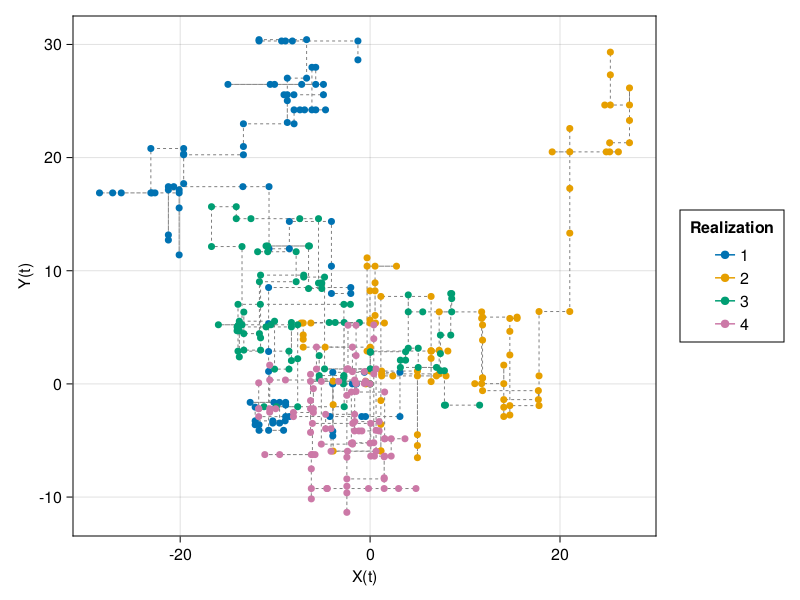

In [15]:
fig1 = plot_rw_2d(100, 4, linewidth = 1)

Simulating $n = 4$ realizations of a 2D Gaussian random walk with $T = 100000$.

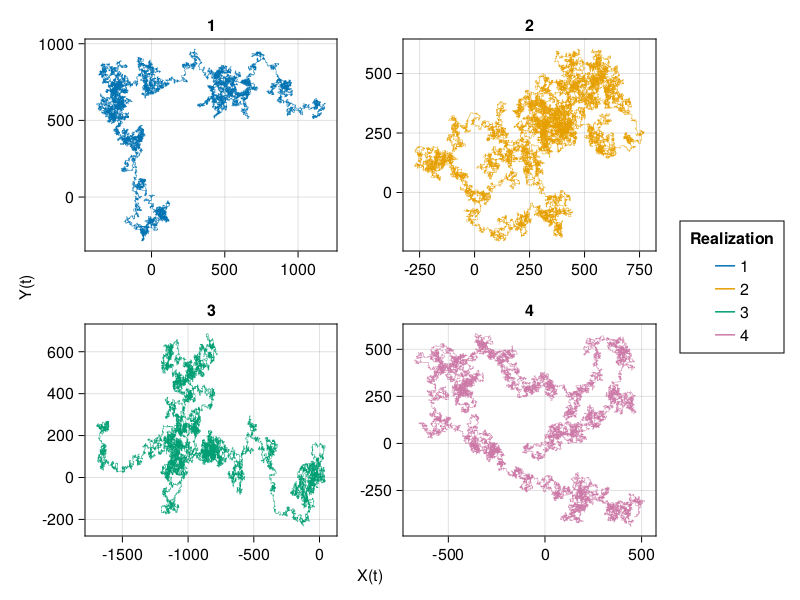

In [16]:
fig2 = plot_rw_2d(100000, 4, onlylines = true, layout = true, linkaxis = false, linewidth = 0.4)

## Sin-cos process

An stochastic process with sine and cosine functions.

### Packages and options

In [17]:
using Distributions
import CairoMakie as MK
using AlgebraOfGraphics

include(joinpath("..", "src", "makie.jl"))

mat2df (generic function with 2 methods)

### Custom functions

The following function simulates $n$ realizations of a process using sin and cos
functions with size $T$.

In [18]:
function plot_process(T, n, lambda; kwargs...)
    # initialize
    t = 0:0.1:T
    y = zeros(length(t), n)

    # simulate
    for i in 1:n
        local Z_1 = rand(Normal(0, 3))
        local Z_2 = rand(Normal(0, 3))
        y[:, i] = Z_1 * cos.(lambda * t) + Z_2 * sin.(lambda * t)
    end

    # visualize
    df = mat2df(y)
    vissim(df, :t, Symbol("X(t)"); kwargs...)
end

plot_process (generic function with 1 method)

### Visualization

Simulating $n = 5$ realizations of the stochastic process with $T = 100$.

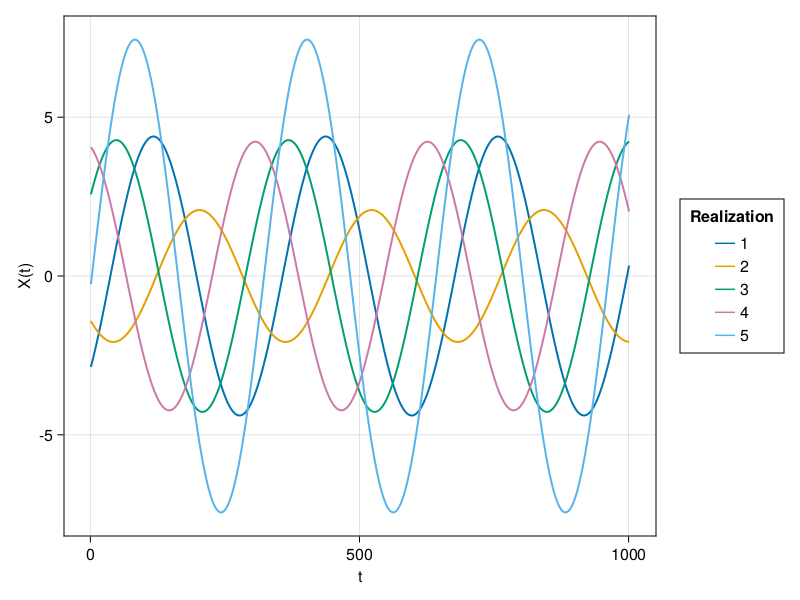

In [19]:
fig1 = plot_process(100, 5, pi / 16; onlylines = true, linewidth = 2)

Simulating $n = 5$ realizations of the stochastic process with $T = 1000$.

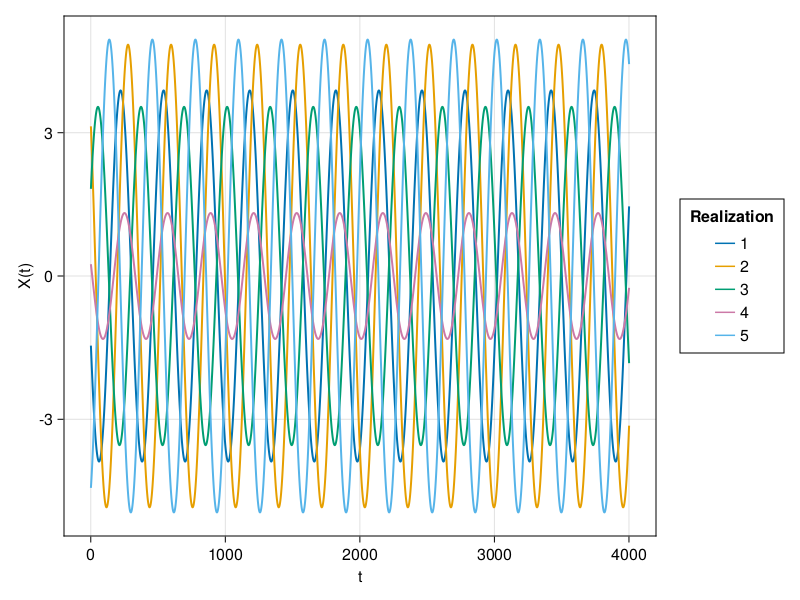

In [20]:
fig2 = plot_process(400, 5, pi / 16; onlylines = true, linewidth = 2)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*